<a href="https://colab.research.google.com/github/jindalritu/my_machineLearning/blob/main/spam_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [11]:
df_spam=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv',encoding='latin-1')
df_spam.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# New Section

# New Section

In [12]:
df_spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df_spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [14]:
df_spam.columns = ['label','Text']
df_spam.head(5)

,label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df_spam['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

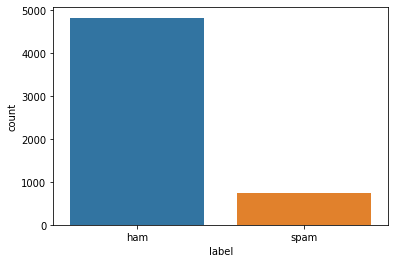

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.catplot(x='labels',y='Text',data = df_spam,kind='boxen',height=6,aspect=3) both x and y should be numeric value
sns.countplot(x='label',data=df_spam)
plt.show()

In [17]:
#Hence, it is imbalanced dataset

In [18]:
df_spam['label'] = df_spam.replace({'ham':0,'spam':1})


In [19]:
df_spam.head(5)

,label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

#print(re.sub('[^a-z]','','he1l9'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:

ps = PorterStemmer()
words=[]
for i in range(0,len(df_spam)):
  review=re.sub('[^a-zA-Z]',' ',df_spam['Text'][i])

  review = review.lower()
  review = review.split()
  #print(review)
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  
  
  review = ' '.join(review)
  #print(review)
  words.append(review)
#print(words)  

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X=cv.fit_transform(words).toarray()
y=df_spam.label
y=y.astype('int')
#print(type(y))


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train,y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 1978    0
3989    1
3935    0
4078    0
4086    1
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: label, Length: 4457, dtype: int64


In [24]:
from sklearn.naive_bayes import MultinomialNB
nv = MultinomialNB()
nv.fit(X_train,y_train)
y_pred = nv.predict(X_test)
print(y_pred)

[0 0 1 ... 0 0 1]


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy:',accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

accuracy: 0.9829596412556054
[[955   9]
 [ 10 141]]
